In [ ]:
"""
Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
"""

In [2]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
#LINK: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
info_gender = data["gender"].unique()
info_married = data["ever_married"].unique()
info_worktype = data["work_type"].unique()
info_residence = data["Residence_type"].unique()
info_smoking = data["smoking_status"].unique()

In [11]:
print(info_gender)
print(info_married)
print(info_worktype)
print(info_residence)
print(info_smoking)


['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [12]:
#Mapeo de los datos:
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
married_map = {'No': 0, 'Yes': 1}
worktype_map = {'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4}
residence_map = {'Rural': 0, 'Urban': 1}
smoking_map = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

In [13]:
data.gender = data.gender.map(gender_map)
data.ever_married = data.ever_married.map(married_map)
data.work_type = data.work_type.map(worktype_map)
data.Residence_type = data.Residence_type.map(residence_map)
data.smoking_status = data.smoking_status.map(smoking_map)

In [14]:
#Revisar si hay datos nulos
data.head()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,0,1
1,51676,1,61.0,0,0,1,4,0,202.21,NaN,1,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,3,1,83.75,NaN,1,0
5106,44873,1,81.0,0,0,1,4,1,125.20,40.0,1,0
5107,19723,1,35.0,0,0,1,4,0,82.99,30.6,1,0
5108,37544,0,51.0,0,0,1,3,0,166.29,25.6,0,0


In [15]:
#Eliminar datos nulos
data.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,0,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,3,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,0,0,103.08,18.6,3,0
5106,44873,1,81.0,0,0,1,4,1,125.20,40.0,1,0
5107,19723,1,35.0,0,0,1,4,0,82.99,30.6,1,0
5108,37544,0,51.0,0,0,1,3,0,166.29,25.6,0,0


In [23]:
data.dropna(inplace=True)

In [24]:
#Separar los datos para entrenamiento y prueba
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
#Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Inicialización del modelo
model = LogisticRegression()


In [29]:
# Entrenamiento del modelo
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9460285132382892


In [32]:
# Matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[929   0]
 [ 53   0]]


In [33]:
# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [ ]:
"""
1. Curva ROC (Receiver Operating Characteristic)
La curva ROC es una herramienta útil para evaluar la 
capacidad de discriminación de un modelo de clasificación en 
diferentes umbrales de probabilidad.
"""

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de las clases positivas
y_probs = model.predict_proba(X_test)[:, 1]

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs)

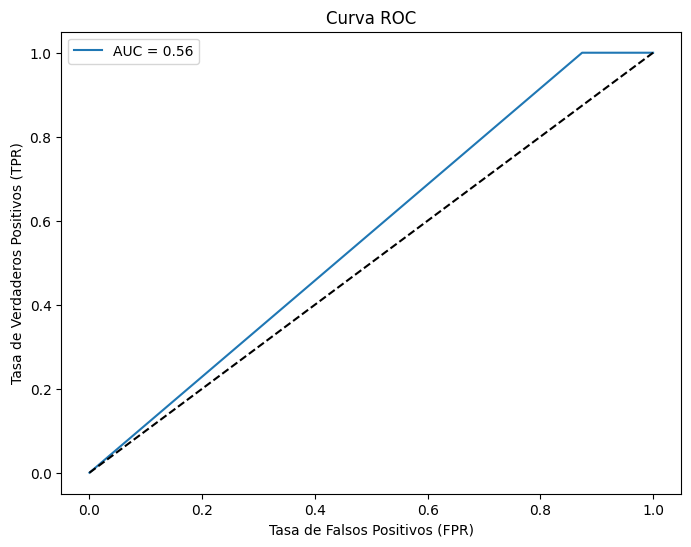

In [36]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
"""
2. Importancia de las Características
Puedes visualizar la importancia de las características 
en el modelo para entender qué características tienen más influencia en las predicciones.
"""

In [37]:
# Obtener la importancia de las características del modelo
feature_importance = model.coef_[0]

In [38]:
# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

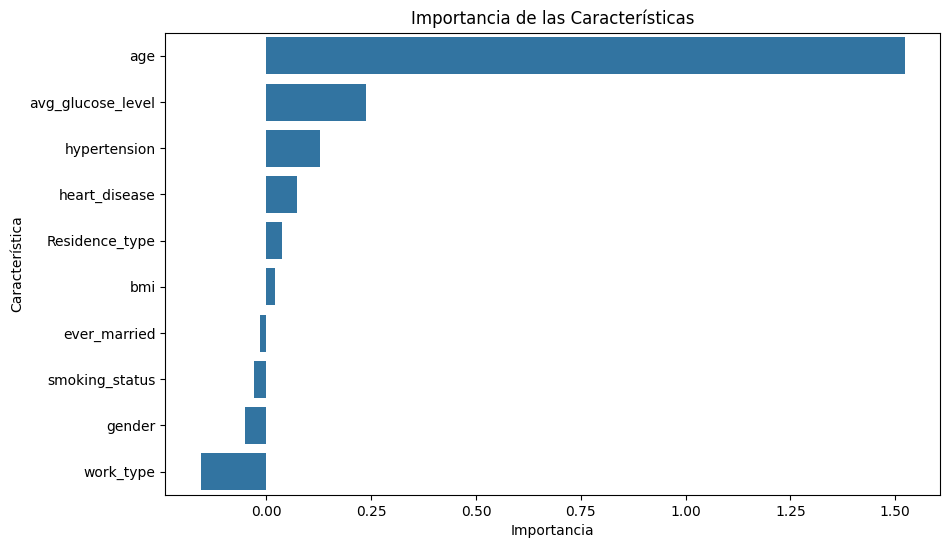

In [39]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [47]:
"""
3. Análisis de Error
Puedes analizar los errores del modelo para identificar patrones y posibles mejoras.
"""

'\n3. Análisis de Error\nPuedes analizar los errores del modelo para identificar patrones y posibles mejoras.\n'

In [48]:
# Agregar predicciones al conjunto de datos de prueba
y_pred = model.predict(X_test)
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted'] = y_pred
X_test_with_pred['True'] = y_test

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [49]:
# Mostrar las instancias donde el modelo predijo incorrectamente
incorrect_predictions = X_test_with_pred[X_test_with_pred['Predicted'] != X_test_with_pred['True']]
print("Incorrect Predictions:")
print(incorrect_predictions)

Incorrect Predictions:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
4336       0  80.0             0              1             1          3   
3709       1  42.0             0              0             0          3   
964        0  66.0             1              0             1          3   
2647       0  29.0             0              0             1          1   
3262       0  47.0             0              0             1          3   
...      ...   ...           ...            ...           ...        ...   
4372       1  37.0             0              0             0          3   
1022       0  22.0             0              0             0          3   
3838       0  56.0             0              0             1          4   
5010       1  72.0             0              0             1          4   
1559       1  53.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  P